Code included for option:
* 1947, 1977/1979 mixed, 2015 based intervals

In [6]:
from datetime import datetime
from pathlib import Path
import glob
import os
import geoutils as gu
import xdem
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import pandas as pd
import altair as alt
from pprint import pprint
from rasterio.enums import Resampling
import copy
import json 


In [8]:
dem_fn_list1 = [
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/dems/1947_09_14.tif",
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/dems/1977_09_27_clipped.tif",
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/dems/2015_09_01.tif"
]

dem_fn_list2 = [
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/dems/1947_09_14.tif",
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/dems/1979_10_06_clipped.tif",
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/dems/2015_09_01.tif"
]

timestamps1 = ['1947_09_14', '1977_09_27', '2015_09_01']
timestamps2 = ['1947_09_14', '1979_10_06', '2015_09_01']

DATE_FILE_FORMAT = "%Y_%m_%d"
reference_dem_date = "2015_09_01"
reference_dem_date = datetime.strptime(
    reference_dem_date, 
    DATE_FILE_FORMAT
)

gcas_polygon_file = "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/whole_mountain/gcas.geojson"

output_file = "outputs/uncertainty_wholemountain.pcl"

RESAMPLING_RES = 5

FILTER_OUTLIERS = True
SIMPLE_FILTER = True
simple_filter_threshold = 50

VARIOGRAM_SUBSAMPLE = 1000
VARIOGRAM_N_VARIOGRAMS = 10
PARALLELISM = 64 #32
XSCALE_RANGE_SPLIT = [200]
MAX_LAG = 1000

In [9]:
datetimes1 = [datetime.strptime(f, DATE_FILE_FORMAT) for f in timestamps1]
datetimes2 = [datetime.strptime(f, DATE_FILE_FORMAT) for f in timestamps2]

# Create DEMCollection

In [10]:
demcollection1 = xdem.DEMCollection.from_files(
    dem_fn_list1, 
    datetimes1, 
    reference_dem_date, 
    None, 
    RESAMPLING_RES,
    Resampling.cubic
)

demcollection2 = xdem.DEMCollection.from_files(
    dem_fn_list2, 
    datetimes2, 
    reference_dem_date, 
    None, 
    RESAMPLING_RES,
    Resampling.cubic
)

bounding_demcollection = xdem.DEMCollection.from_files(
    [dem_fn_list1[0], dem_fn_list1[-1]], 
    [datetimes1[0], datetimes1[-1]], 
    reference_dem_date, 
    None, 
    RESAMPLING_RES,
    Resampling.cubic
)

In [11]:
_ = demcollection1.subtract_dems_intervalwise()
_ = demcollection2.subtract_dems_intervalwise()
_ = bounding_demcollection.subtract_dems_intervalwise()

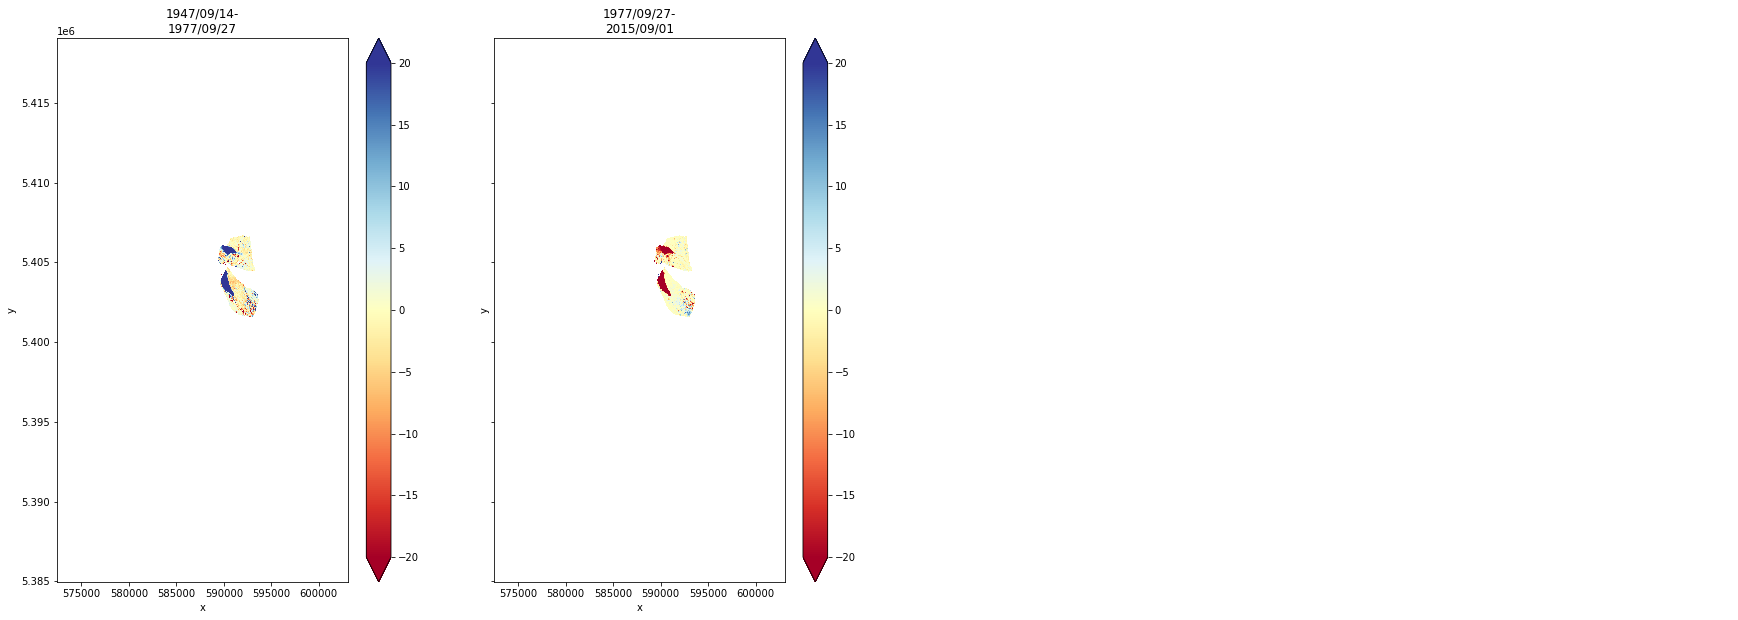

In [12]:
fig, axes = demcollection1.plot_ddems(figsize=(30, 10), vmin=-20, vmax=20, interpolation = "none")
# fig.savefig(os.path.join(plot_output_dir, "dod_gallery.png"))
plt.show()

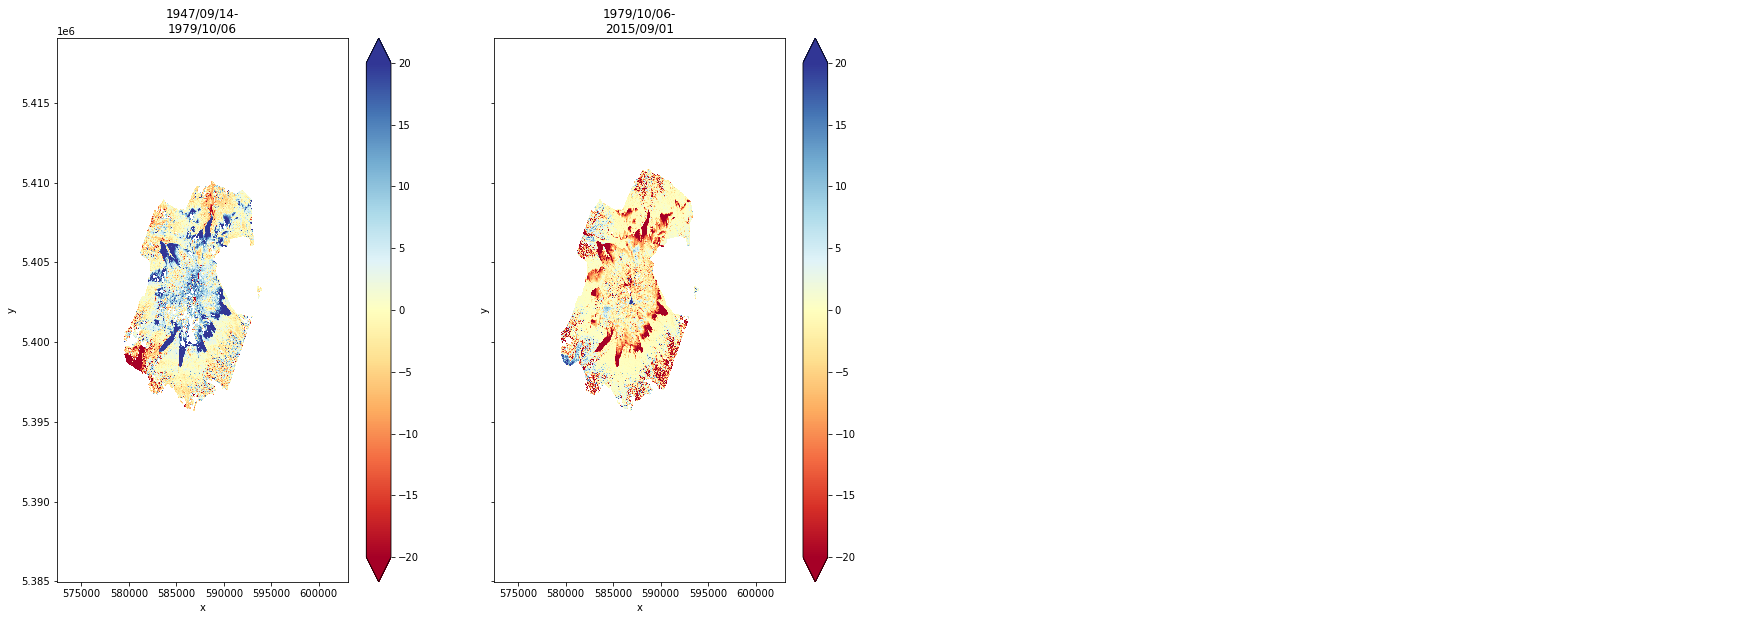

In [13]:
fig, axes = demcollection2.plot_ddems(figsize=(30, 10), vmin=-20, vmax=20, interpolation = "none")
# fig.savefig(os.path.join(plot_output_dir, "dod_gallery.png"))
plt.show()

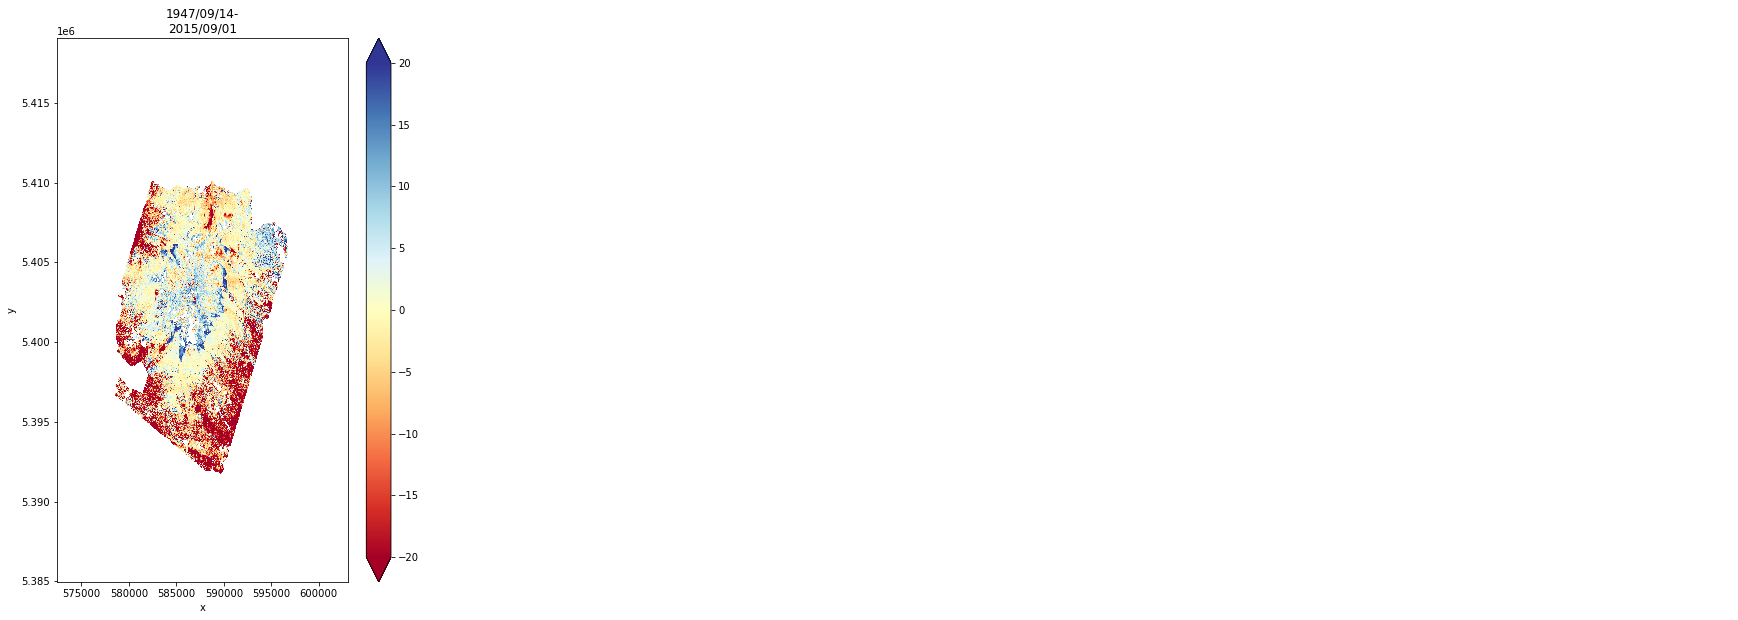

In [14]:
fig, axes = bounding_demcollection.plot_ddems(figsize=(30, 10), vmin=-20, vmax=20, interpolation = "none")
# fig.savefig(os.path.join(plot_output_dir, "dod_gallery.png"))
plt.show()

In [15]:
gcas_vector = gu.Vector(gcas_polygon_file)

In [16]:
# Collect the results as we create them
results_dict = {}

def clean_interval_string(interval):
    return interval.left.strftime("%y_%m_%d") + "__" + interval.right.strftime("%y_%m_%d")

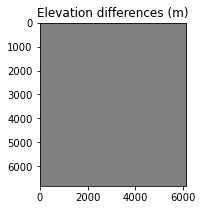

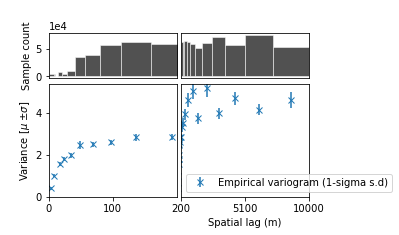

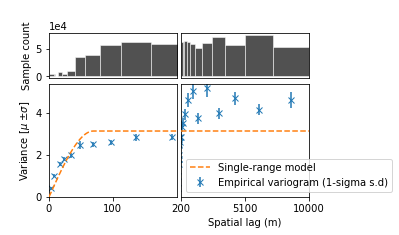

{'Count of all pixels': 411526,
 'Count of stable pixels': 23391,
 'Interval': Interval('1947-09-14', '1977-09-27', closed='right'),
 'Max': 12.4986572265625,
 'Mean': -1.1491806507110596,
 'Median': -1.033935546875,
 'Min': -24.8929443359375,
 'NMAD': 1.8823880126953123,
 'Outlier lower limit': -50,
 'Outlier upper limit': 50,
 'Percentage all pixels filtered/removed': 0.07680952968492367,
 'Percentage stable pixels filtered/removed': 0.0,
 'RMSE': 2.3640314869783157,
 'Range': 69.55512208242256,
 'Sill': 3.1276556419711072,
 'StdDev': 2.0659213066101074,
 'pre-filter': {'Count of all pixels': 445765,
                'Count of stable pixels': 23391,
                'Max': 12.4986572265625,
                'Mean': -1.1491806507110596,
                'Median': -1.033935546875,
                'Min': -24.8929443359375,
                'NMAD': 1.8823880126953123,
                'RMSE': 2.3640314869783157,
                'StdDev': 2.0659213066101074}}


Process ForkPoolWorker-82:
Process ForkPoolWorker-75:
Process ForkPoolWorker-76:
Process ForkPoolWorker-67:
Process ForkPoolWorker-104:
Process ForkPoolWorker-87:
Process ForkPoolWorker-103:
Process ForkPoolWorker-111:
Process ForkPoolWorker-72:
Process ForkPoolWorker-97:
Process ForkPoolWorker-92:
Process ForkPoolWorker-74:
Process ForkPoolWorker-100:
Process ForkPoolWorker-102:
Process ForkPoolWorker-78:
Process ForkPoolWorker-84:
Process ForkPoolWorker-105:
Process ForkPoolWorker-88:
Process ForkPoolWorker-71:
Process ForkPoolWorker-109:
Process ForkPoolWorker-106:
Process ForkPoolWorker-115:
Process ForkPoolWorker-113:
Process ForkPoolWorker-95:
Process ForkPoolWorker-94:
Process ForkPoolWorker-81:
Process ForkPoolWorker-89:
Process ForkPoolWorker-77:
Process ForkPoolWorker-80:
Process ForkPoolWorker-79:
Process ForkPoolWorker-90:
Process ForkPoolWorker-114:
Process ForkPoolWorker-117:
Process ForkPoolWorker-69:
Process ForkPoolWorker-73:
Process ForkPoolWorker-101:
Process ForkPoo

In [17]:
from uncertainty_helpers import uncertainty_analysis

for ddem in demcollection1.ddems + demcollection2.ddems + bounding_demcollection.ddems:
    # try:
    results, figs = uncertainty_analysis(
        ddem,
        gcas_vector,
        subsample = VARIOGRAM_SUBSAMPLE,
        n_variograms = VARIOGRAM_N_VARIOGRAMS,
        xscale_range_split = XSCALE_RANGE_SPLIT,
        parallelism=PARALLELISM,
        maxlag=MAX_LAG,
        FILTER_OUTLIERS = FILTER_OUTLIERS,
        SIMPLE_FILTER = SIMPLE_FILTER,
        simple_filter_threshold = simple_filter_threshold
    )
    interval_string = clean_interval_string(ddem.interval)
    # figs[0].savefig(os.path.join(plot_output_dir, f"dod_uncertainty_static_areas_{interval_string}.png"))
    # figs[1].savefig(os.path.join(plot_output_dir, f"dod_uncertainty_empirical_variogram_{interval_string}.png"))
    # figs[2].savefig(os.path.join(plot_output_dir, f"dod_uncertainty_fit_variogram_{interval_string}.png"))
    pprint(results, width=1)
    results_dict[results["Interval"]] = results
    # except Exception as exc:
        # print(f"Failed on ddem: {ddem.interval}")
        # print(exc)

In [12]:
from scipy import stats

In [13]:
results_df = pd.DataFrame(results_dict).transpose().reset_index(drop=True)
results_df['Start Date'] = results_df['Interval'].apply(lambda x: x.left)
results_df['End Date'] = results_df['Interval'].apply(lambda x: x.right)
results_df['NMAD'] = pd.to_numeric(results_df['NMAD'])
results_df['Mean'] = pd.to_numeric(results_df['Mean'])
results_df['RMSE'] = pd.to_numeric(results_df['RMSE'])
results_df['Range'] = pd.to_numeric(results_df['Range'])
results_df['Sill'] = pd.to_numeric(results_df['Sill'])

results_df['StdDev'] = pd.to_numeric(results_df['StdDev'])
results_df['90% CI'] = results_df.apply(lambda row: stats.norm.interval(0.90, loc=row['Mean'], scale=row['StdDev']), axis=1)
results_df['90% CI Lower Bound'] = pd.to_numeric(results_df['90% CI'].apply(lambda x: x[0]))
results_df['90% CI Upper Bound'] = pd.to_numeric(results_df['90% CI'].apply(lambda x: x[1]))

results_df

,Range,Sill,Interval,NMAD,Mean,Median,RMSE,StdDev,Max,Min,...,Outlier lower limit,Outlier upper limit,pre-filter,Percentage all pixels filtered/removed,Percentage stable pixels filtered/removed,Start Date,End Date,90% CI,90% CI Lower Bound,90% CI Upper Bound
0,92.577789,3.074010,"(1947-09-14, 1977-09-27]",1.832799,-1.156113,-1.025757,2.298529,1.986615,8.984253,-13.166626,...,-50,50,"{'NMAD': 1.8327990966796874, 'Mean': -1.156112...",0.076599,0.0,1947-09-14,1977-09-27,"(-4.423803345299591, 2.1115782419212943)",-4.423803,2.111578
1,144.239071,0.122744,"(1977-09-27, 2015-09-01]",0.196908,-0.023239,0.003296,0.470003,0.469428,3.947632,-12.457642,...,-50,50,"{'NMAD': 0.1969078125, 'Mean': -0.023238837718...",0.059307,0.0,1977-09-27,2015-09-01,"(-0.7953798280395362, 0.7489021526016086)",-0.795380,0.748902
2,104.240210,3.605875,"(1947-09-14, 1979-10-06]",1.855060,0.732538,0.752014,2.269521,2.148049,44.926025,-49.199463,...,-50,50,"{'NMAD': 1.8563266845703124, 'Mean': 0.4828722...",0.012973,0.000638,1947-09-14,1979-10-06,"(-2.8006878237183526, 4.265764151042265)",-2.800688,4.265764
3,38.146076,0.201961,"(1979-10-06, 2015-09-01]",0.361420,0.061122,0.034546,0.745669,0.743160,24.834595,-25.909424,...,-50,50,"{'NMAD': 0.3614199462890625, 'Mean': 0.0611220...",0.010796,0.0,1979-10-06,2015-09-01,"(-1.1612672219150968, 1.2835112596028748)",-1.161267,1.283511
4,42.584621,2.827411,"(1947-09-14, 2015-09-01]",1.841486,0.491883,0.549194,2.204081,2.148494,44.677979,-47.967773,...,-50,50,"{'NMAD': 1.842753076171875, 'Mean': 0.28060963...",0.002358,0.000541,1947-09-14,2015-09-01,"(-3.0420743033379187, 4.025840441891537)",-3.042074,4.025840


In [14]:
results_df['bounding'] = results_df['Interval'].apply(lambda x: x.left == datetimes1[0] and x.right == datetimes1[-1])
results_df

,Range,Sill,Interval,NMAD,Mean,Median,RMSE,StdDev,Max,Min,...,Outlier upper limit,pre-filter,Percentage all pixels filtered/removed,Percentage stable pixels filtered/removed,Start Date,End Date,90% CI,90% CI Lower Bound,90% CI Upper Bound,bounding
0,92.577789,3.074010,"(1947-09-14, 1977-09-27]",1.832799,-1.156113,-1.025757,2.298529,1.986615,8.984253,-13.166626,...,50,"{'NMAD': 1.8327990966796874, 'Mean': -1.156112...",0.076599,0.0,1947-09-14,1977-09-27,"(-4.423803345299591, 2.1115782419212943)",-4.423803,2.111578,False
1,144.239071,0.122744,"(1977-09-27, 2015-09-01]",0.196908,-0.023239,0.003296,0.470003,0.469428,3.947632,-12.457642,...,50,"{'NMAD': 0.1969078125, 'Mean': -0.023238837718...",0.059307,0.0,1977-09-27,2015-09-01,"(-0.7953798280395362, 0.7489021526016086)",-0.795380,0.748902,False
2,104.240210,3.605875,"(1947-09-14, 1979-10-06]",1.855060,0.732538,0.752014,2.269521,2.148049,44.926025,-49.199463,...,50,"{'NMAD': 1.8563266845703124, 'Mean': 0.4828722...",0.012973,0.000638,1947-09-14,1979-10-06,"(-2.8006878237183526, 4.265764151042265)",-2.800688,4.265764,False
3,38.146076,0.201961,"(1979-10-06, 2015-09-01]",0.361420,0.061122,0.034546,0.745669,0.743160,24.834595,-25.909424,...,50,"{'NMAD': 0.3614199462890625, 'Mean': 0.0611220...",0.010796,0.0,1979-10-06,2015-09-01,"(-1.1612672219150968, 1.2835112596028748)",-1.161267,1.283511,False
4,42.584621,2.827411,"(1947-09-14, 2015-09-01]",1.841486,0.491883,0.549194,2.204081,2.148494,44.677979,-47.967773,...,50,"{'NMAD': 1.842753076171875, 'Mean': 0.28060963...",0.002358,0.000541,1947-09-14,2015-09-01,"(-3.0420743033379187, 4.025840441891537)",-3.042074,4.025840,True


In [15]:
chart = alt.Chart(results_df.drop(columns="Interval")).transform_filter(
   alt.datum.bounding == False
).mark_bar(
    strokeWidth = 3,
    stroke="white",
).encode(
    alt.X("Start Date:T"),
    alt.X2("End Date:T"),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    # width=200,
    height=150
).repeat(
    row=['NMAD', 'Mean', 'RMSE', 'Range', 'Sill', 'StdDev', '90% CI Lower Bound', '90% CI Upper Bound']
)

chart_bounding = alt.Chart(results_df.drop(columns="Interval")).transform_filter(
   alt.datum.bounding == True
).mark_bar(
    strokeWidth = 3,
    stroke="white",
).encode(
    alt.X("Start Date:T"),
    alt.X2("End Date:T"),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    # width=200,
    height=150
).repeat(
    row=['NMAD', 'Mean', 'RMSE', 'Range', 'Sill', 'StdDev', '90% CI Lower Bound', '90% CI Upper Bound']
)

chart

alt.RepeatChart(...)

In [16]:
chart_bounding

alt.RepeatChart(...)

In [17]:
results_df

,Range,Sill,Interval,NMAD,Mean,Median,RMSE,StdDev,Max,Min,...,Outlier upper limit,pre-filter,Percentage all pixels filtered/removed,Percentage stable pixels filtered/removed,Start Date,End Date,90% CI,90% CI Lower Bound,90% CI Upper Bound,bounding
0,92.577789,3.074010,"(1947-09-14, 1977-09-27]",1.832799,-1.156113,-1.025757,2.298529,1.986615,8.984253,-13.166626,...,50,"{'NMAD': 1.8327990966796874, 'Mean': -1.156112...",0.076599,0.0,1947-09-14,1977-09-27,"(-4.423803345299591, 2.1115782419212943)",-4.423803,2.111578,False
1,144.239071,0.122744,"(1977-09-27, 2015-09-01]",0.196908,-0.023239,0.003296,0.470003,0.469428,3.947632,-12.457642,...,50,"{'NMAD': 0.1969078125, 'Mean': -0.023238837718...",0.059307,0.0,1977-09-27,2015-09-01,"(-0.7953798280395362, 0.7489021526016086)",-0.795380,0.748902,False
2,104.240210,3.605875,"(1947-09-14, 1979-10-06]",1.855060,0.732538,0.752014,2.269521,2.148049,44.926025,-49.199463,...,50,"{'NMAD': 1.8563266845703124, 'Mean': 0.4828722...",0.012973,0.000638,1947-09-14,1979-10-06,"(-2.8006878237183526, 4.265764151042265)",-2.800688,4.265764,False
3,38.146076,0.201961,"(1979-10-06, 2015-09-01]",0.361420,0.061122,0.034546,0.745669,0.743160,24.834595,-25.909424,...,50,"{'NMAD': 0.3614199462890625, 'Mean': 0.0611220...",0.010796,0.0,1979-10-06,2015-09-01,"(-1.1612672219150968, 1.2835112596028748)",-1.161267,1.283511,False
4,42.584621,2.827411,"(1947-09-14, 2015-09-01]",1.841486,0.491883,0.549194,2.204081,2.148494,44.677979,-47.967773,...,50,"{'NMAD': 1.842753076171875, 'Mean': 0.28060963...",0.002358,0.000541,1947-09-14,2015-09-01,"(-3.0420743033379187, 4.025840441891537)",-3.042074,4.025840,True


In [18]:
results_df.to_pickle(output_file)